In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
train_dir=r'E:\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\train'
validation_dir=r'E:\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\validation'
test_dir=r'E:\Data_set__Presentation_and_Python_Notebook_for_Image_Recognition_Project_Module\Data set, Presentation and Python Notebook for Image recognition project module\cats_and_dogs\test'

# Data Processing


### - Read the picture files.
### -Decode the JPEG content to RGB grinds of pixels
### -Convert these into floating point tensors.
### -Rescale the pixel values (between 0 and 255) to the [0,1] interval

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Generating batches of tensor image data

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

validation_generator=test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [10]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 17, 17, 128)      

In [12]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [15]:
history=model.fit(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/20
100/100 [==============================] - 164s 2s/step - loss: 0.6953 - acc: 0.5135 - val_loss: 0.6915 - val_acc: 0.5120
Epoch 2/20
100/100 [==============================] - 49s 491ms/step - loss: 0.6880 - acc: 0.5595 - val_loss: 0.6668 - val_acc: 0.5990
Epoch 3/20
100/100 [==============================] - 57s 567ms/step - loss: 0.6572 - acc: 0.6580 - val_loss: 0.6352 - val_acc: 0.6270
Epoch 4/20
100/100 [==============================] - 76s 759ms/step - loss: 0.6031 - acc: 0.6690 - val_loss: 0.5756 - val_acc: 0.7090
Epoch 5/20
100/100 [==============================] - 49s 489ms/step - loss: 0.5428 - acc: 0.7325 - val_loss: 0.5745 - val_acc: 0.7070
Epoch 6/20
100/100 [==============================] - 44s 444ms/step - loss: 0.5101 - acc: 0.7535 - val_loss: 0.5686 - val_acc: 0.7170
Epoch 7/20
100/100 [==============================] - 48s 467ms/step - loss: 0.4641 - acc: 0.7820 - val_loss: 0.6083 - val_acc: 0.7410
Epoch 8/20
100/100 [==============================] - 51s

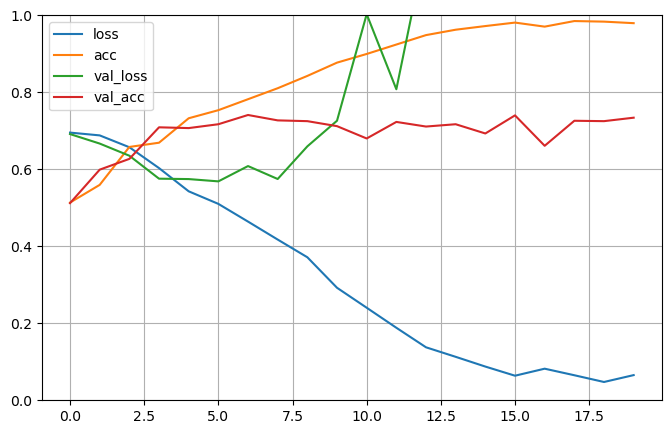

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
model.save('model.keras')

In [28]:
train_datagen1=ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

test_datagen1=ImageDataGenerator(rescale=1./255)

train_generator1=train_datagen1.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=32,
                class_mode='binary')

validation_generator1=test_datagen1.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    batch_size=32,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
model_a=models.Sequential()

model_a.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model_a.add(layers.MaxPooling2D((2,2)))

model_a.add(layers.Conv2D(64,(3,3),activation='relu'))
model_a.add(layers.MaxPooling2D((2,2)))

model_a.add(layers.Conv2D(128,(3,3),activation='relu'))
model_a.add(layers.MaxPooling2D((2,2)))

model_a.add(layers.Conv2D(128,(3,3),activation='relu'))
model_a.add(layers.MaxPooling2D((2,2)))

model_a.add(layers.Flatten())
model_a.add(layers.Dropout(0.5))

model_a.add(layers.Dense(512,activation='relu'))
model_a.add(layers.Dense(1,activation='sigmoid'))

In [32]:
from tensorflow.keras import optimizers
model_a.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [36]:
his=model_a.fit(train_generator1,
             steps_per_epoch=int(2000/32),
             epochs=100,
             validation_data=validation_generator1,
             validation_steps=int(1000/32))

Epoch 1/100
62/62 [==============================] - 59s 955ms/step - loss: 0.6900 - acc: 0.5239 - val_loss: 0.6815 - val_acc: 0.5938
Epoch 2/100
62/62 [==============================] - 40s 647ms/step - loss: 0.6841 - acc: 0.5437 - val_loss: 0.7141 - val_acc: 0.5312
Epoch 3/100
62/62 [==============================] - 40s 641ms/step - loss: 0.6777 - acc: 0.5650 - val_loss: 0.8099 - val_acc: 0.3750
Epoch 4/100
62/62 [==============================] - 38s 605ms/step - loss: 0.6708 - acc: 0.5716 - val_loss: 0.7017 - val_acc: 0.4375
Epoch 5/100
62/62 [==============================] - 39s 625ms/step - loss: 0.6651 - acc: 0.5899 - val_loss: 0.6463 - val_acc: 0.6250
Epoch 6/100
62/62 [==============================] - 40s 636ms/step - loss: 0.6698 - acc: 0.5727 - val_loss: 0.6228 - val_acc: 0.7188
Epoch 7/100
62/62 [==============================] - 40s 643ms/step - loss: 0.6563 - acc: 0.5976 - val_loss: 0.7237 - val_acc: 0.5938
Epoch 8/100
62/62 [==============================] - 40s 647ms

Epoch 62/100
62/62 [==============================] - 37s 602ms/step - loss: 0.4885 - acc: 0.7556 - val_loss: 0.4362 - val_acc: 0.7500
Epoch 63/100
62/62 [==============================] - 37s 596ms/step - loss: 0.4850 - acc: 0.7647 - val_loss: 0.5746 - val_acc: 0.8125
Epoch 64/100
62/62 [==============================] - 37s 596ms/step - loss: 0.4893 - acc: 0.7673 - val_loss: 0.2978 - val_acc: 0.8750
Epoch 65/100
62/62 [==============================] - 37s 596ms/step - loss: 0.4778 - acc: 0.7683 - val_loss: 0.5268 - val_acc: 0.7500
Epoch 66/100
62/62 [==============================] - 37s 595ms/step - loss: 0.4775 - acc: 0.7693 - val_loss: 0.4433 - val_acc: 0.7188
Epoch 67/100
62/62 [==============================] - 37s 595ms/step - loss: 0.4709 - acc: 0.7769 - val_loss: 0.4530 - val_acc: 0.7812
Epoch 68/100
62/62 [==============================] - 37s 598ms/step - loss: 0.4748 - acc: 0.7673 - val_loss: 0.4765 - val_acc: 0.7812
Epoch 69/100
62/62 [==============================] - 3

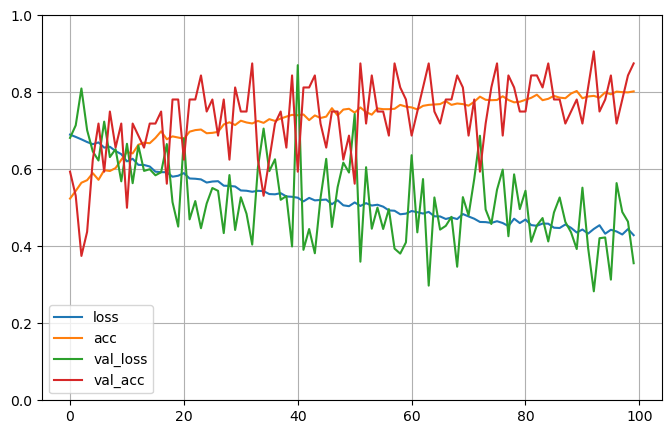

In [37]:
import pandas as pd

pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# VGG16

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                 batch_size=20,
                                                 class_mode='binary')

validation_generator=test_datagen.flow_from_directory(test_dir,
                                                     target_size=(150,150),
                                                     batch_size=20,
                                                     class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras.applications import VGG16

conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

58889256/58889256 [==============================] - 70s 1us/step


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=2e-5),
             metrics=['acc'])

In [14]:
from tensorflow import keras

In [16]:
cb=keras.callbacks.ModelCheckpoint('CNN_Project_Model={epoch:02d}.keras')

In [ ]:
his=model.fit(train_generator,
             steps_per_epoch=100,
             epochs=30,
             validation_data=validation_generator,
             callbacks=[cb])

In [ ]:
import pandas as pd
pd.DataFrame(his.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
test_generator=test_datagen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=20,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model.evaluate(test_generator,steps=50)